In [35]:
# 作业2

# 导入模块及数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Logistic函数
from sklearn.model_selection import train_test_split # 训练集-测试集分割
from sklearn.metrics import roc_curve, auc # ROC曲线，AUC值
from sklearn.model_selection import LeaveOneOut

df = pd.read_csv("Leukemia_yx.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 3573 entries, Unnamed: 0 to x3571
dtypes: float64(3571), int64(2)
memory usage: 2.0 MB


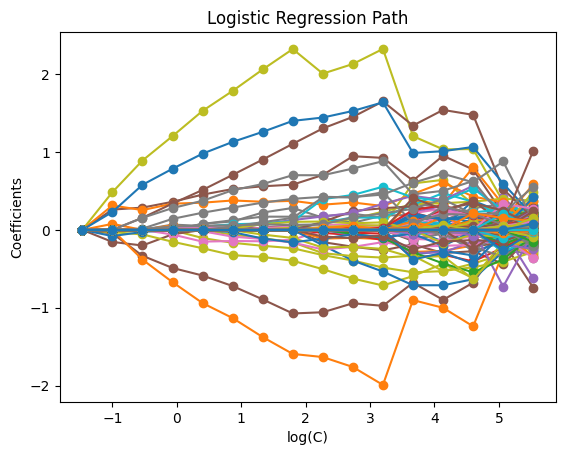

'\n横坐标log(C)和纵坐标Coefficients啥意思？\n'

In [36]:
# plot regularization path（不太懂，先模仿着画一画）
from sklearn.svm import l1_min_c

df_Y = df.iloc[:,1]
df_X = df.iloc[:,2:]

cs = l1_min_c(df_X, df_Y, loss="log") * np.logspace(0, 7, 16)

clf = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(df_X, df_Y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

"""
横坐标log(C)和纵坐标Coefficients啥意思？
"""

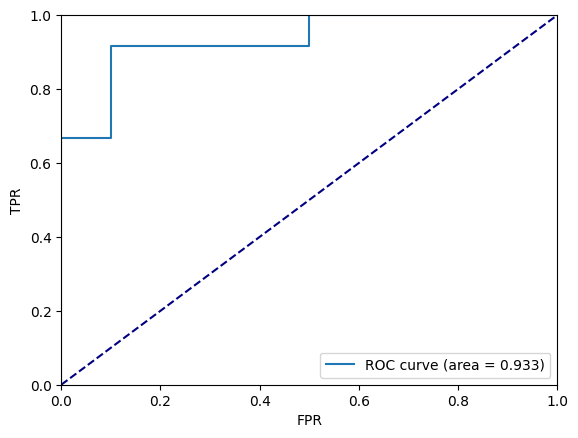

In [37]:
# 画ROC曲线（当特征数目远大于样例数时，把l1正则项纳入损失以剔除无效特征）

X_train,  X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=0) # 由于题目未给定测试集，故从过采样后数据集中随机抽取30%作为测试集
LR = LogisticRegression(penalty="l1",solver="liblinear",C=1.0).fit(X_train, Y_train)
FPR, TPR, thresholds = roc_curve(Y_test, LR.decision_function(X_test))
AUC = auc(FPR, TPR)
plt.plot(FPR,TPR,label="ROC curve (area = "+str(round(AUC,3))+")")
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 特征筛选
"""
大致思路是：构建l1惩罚下的Logistic模型，默认概率阈值为0.5，通过不断调整惩罚系数C的大小来看保留哪些特征合适，即模型法作特征筛选

如何做测试？小样本下采用留一交叉验证法
"""

loo = LeaveOneOut()
C = np.array([0.1, 0.2, 0.5, 1, 2, 5, 10]) # 惩罚系数
Accuracy = np.array([]) # 准确率
length = len(C)
for j in range(length):
    count = 0
    for index_train, index_test in loo.split(df_X, df_Y): #
        X_train = df_X.iloc[index_train,:]; Y_train = df_Y.iloc[index_train] # 训练集之一
        X_test = df_X.iloc[index_test,:]; Y_test_temp = df_Y.iloc[index_test] # 测试集之一
        for value in Y_test_temp:
            Y_test = value
        LR = LogisticRegression(penalty="l1",solver="liblinear",C=C[j]).fit(X_train, Y_train)
        Y_pred = LR.predict(X_test)
        if Y_pred[0]==Y_test: count = count+1
    Accuracy =  np.append(Accuracy, count/len(df_Y))
"""
[0.94444444, 0.94444444, 0.95833333, 0.97222222, 0.95833333, 0.95833333, 0.95833333]
可以看到，当惩罚系数alpha为1时，准确率较高，当然这只是一个大概的结果
"""

LR = LogisticRegression(penalty="l1",solver="liblinear",C=1).fit(df_X, df_Y)
coef = LR.coef_[0]
Features = df_X.columns
length = len(Features)
count = 0
for i in range(length):
    if coef[i]!=0:
        print(str(Features[i])+":"+str(coef[i]))

"""
系数非零的特征：
x219:-0.05213549225951296
x456:-0.45872187731768094
x626:-0.2267953318272452
x672:-0.42161539188488206
x956:0.5392082822705994
x979:0.8895496533328163
x1000:0.0146409235752479
x1001:-0.00449778644796792
x1099:0.06092240023725874
x1182:0.37222689448257784
x1219:-0.05769976378560328
x1652:0.27007114601741145
x1835:0.027034203891736677
x1946:0.5646028711573955
x2141:-0.08758548096340958
x2230:0.1831015036598737
x2239:-0.08321547451116794
x2481:0.46770875342467605
x2537:0.08855580963030497
x2727:-0.11285334187732751
x2859:-0.056441481263920124
x2888:0.109920931799769
x3038:0.036000418677544506
x3098:0.08230259045174555
x3158:0.07616369119171175
x3216:0.02043869826482359
"""